In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use(['science', 'notebook', 'grid'])
from numpy import sin, cos, pi, sqrt

The equation of motion for double pendulum in a plane is:

$$2l\ddot\theta_1+l\cos(\theta_1-\theta_2)\ddot \theta_2+l\sin(\theta_1-\theta_2)\dot\theta_2^2-2g\sin(\theta_1)=0$$
$$l\ddot\theta_2 + l\cos(\theta_1 - \theta_2)\ddot\theta_1-l\sin(\theta_1 - \theta_2)\dot\theta_1^2 - g\sin(\theta_2)=0$$

As I know only the Euler method so I substituite the $\dot\theta = \omega$. Therefor the equations becomes:
4 simulataneous equations:



$$\dot\theta_1 = \omega_1$$

$$\dot\theta_2 = \omega_2$$

$$l(2 - \cos^2(\theta_1-\theta_2))\dot\omega_1=g(2\sin(\theta_1)-\sin(\theta_2) \cos(\theta_1-\theta_2))-l\sin(\theta_1-\theta_2)(\cos(\theta_1-\theta_2)\omega_1^2+\omega_2^2)$$

$$l\left(1-\frac{\cos^2(\theta_1-\theta_2)}{2}\right)\dot\omega_2=g(\sin(\theta_2)-\cos(\theta_1-\theta_2)\sin(\theta_1))+l\sin(\theta_1-\theta_2)\left(\omega_1^2+\frac{1}{2}\cos(\theta_1-\theta_2)\omega_2^2\right)$$


In [2]:
#Parameters:
m = 10; l = 5; g = 9.8;


#Intial conditions
ti = 0; tht1 = np.pi/2; tht2 = np.pi/2; w1 = 0; w2 = 0; tf = 10; h = 0.01

#Empty lists:
tt = []; THT1 = []; THT2 = []; WW1 = []; WW2 = []

#Diffarential equations:
def alpha1(tht1, tht2, w1, w2):
    return (g*(2*sin(tht1)-sin(tht2))-l*sin(tht1 - tht2)*(cos(tht1-tht2)*w1**2+w2**2))/(l*(2-(cos(tht1-tht2))**2))

def alpha2(tht1, tht2, w1, w2):
    return (g*(sin(tht2)-cos(tht1-tht2)*sin(tht1))+l*sin(tht1-tht2)*(w1**2 + 0.5*cos(tht1-tht2)*w2**2))/(1-0.5*(cos(tht1-tht2)**2))

while abs(ti - tf) > h:
    tt.append(ti)
    THT1.append(tht1)
    THT2.append(tht2)
    WW1.append(w1)
    WW2.append(w2)
    ti += h
    tht1 += h*w1
    tht2 += h*w2
    w1 += h*alpha1(tht1, tht2, w1, w2)
    w2 += h*alpha2(tht1, tht2, w1, w2)

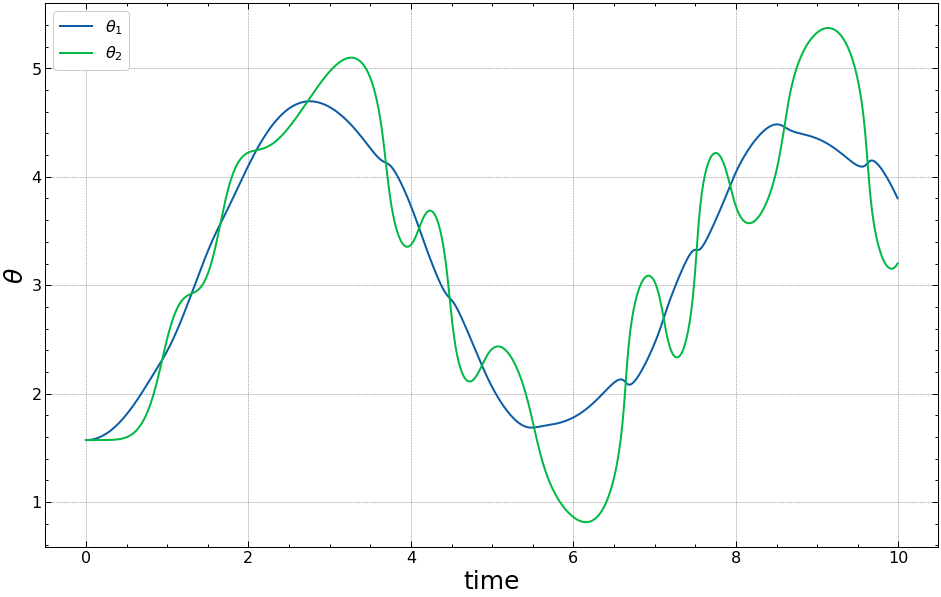

In [3]:
plt.figure(figsize=(16, 10))
plt.plot(tt, THT1, label = r"$\theta_1$")
plt.plot(tt, THT2, label = r"$\theta_2$")
plt.legend(loc = "best")
plt.xlabel("time", size = 25)
plt.ylabel(r"$\theta$", size = 25)
plt.show()

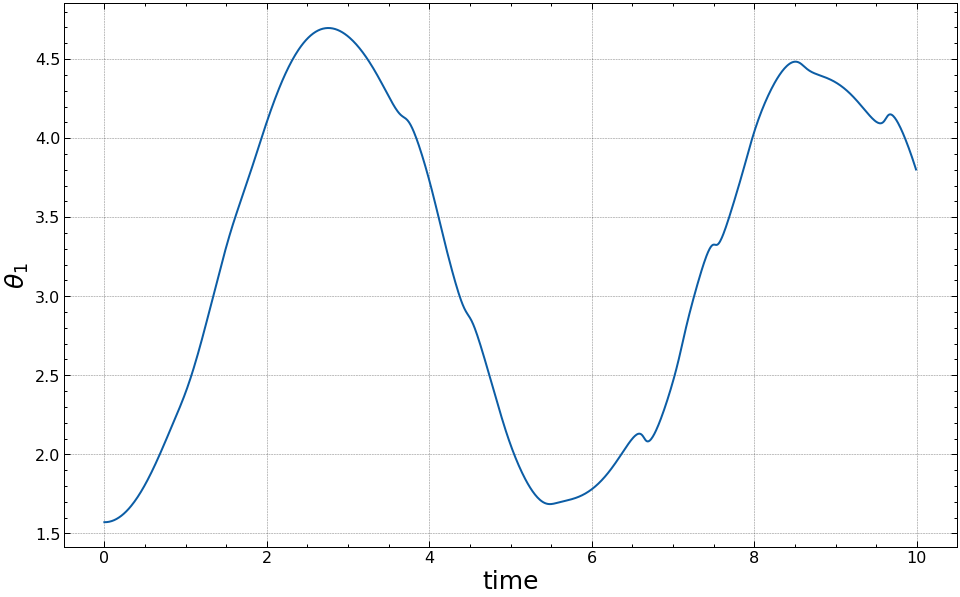

In [4]:
plt.figure(figsize=(16, 10))
plt.plot(tt, THT1)
plt.xlabel("time", size = 25)
plt.ylabel(r"$\theta_1$", size = 25)
plt.show()

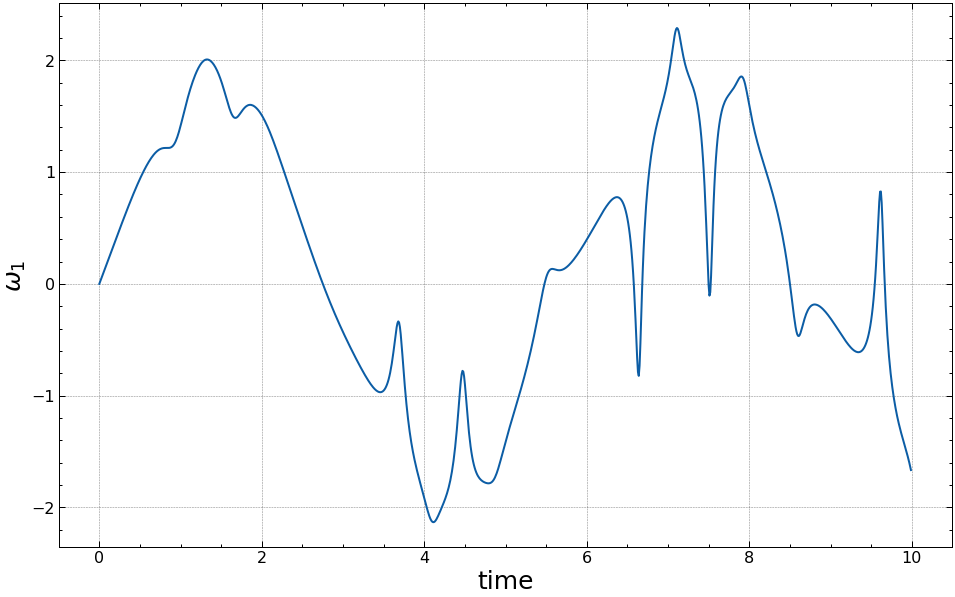

In [5]:
plt.figure(figsize=(16, 10))
plt.plot(tt, WW1)
plt.xlabel("time", size = 25)
plt.ylabel(r"$\omega_1$", size = 25)
plt.show()

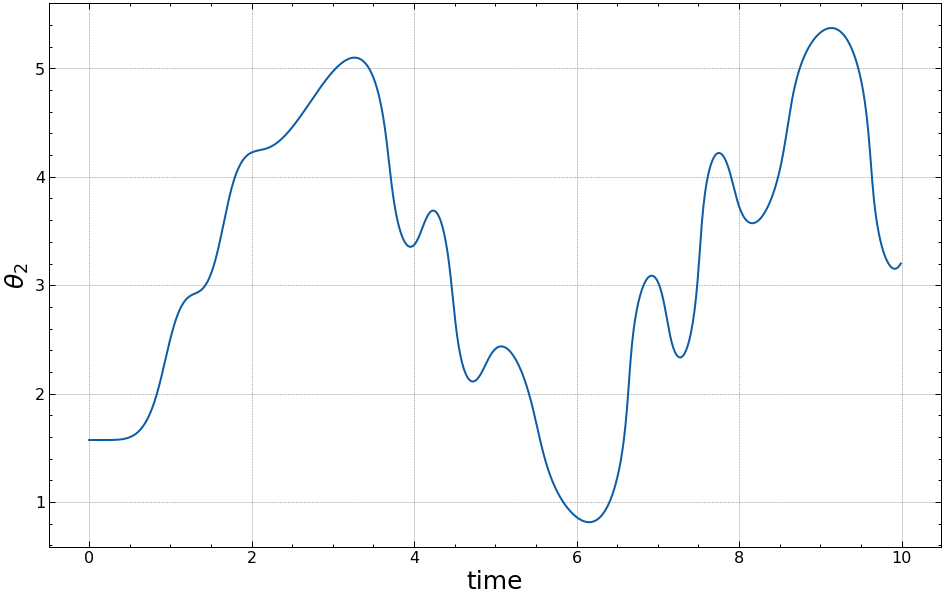

In [6]:
plt.figure(figsize=(16, 10))
plt.plot(tt, THT2)
plt.xlabel("time", size = 25)
plt.ylabel(r"$\theta_2$", size = 25)
plt.show()

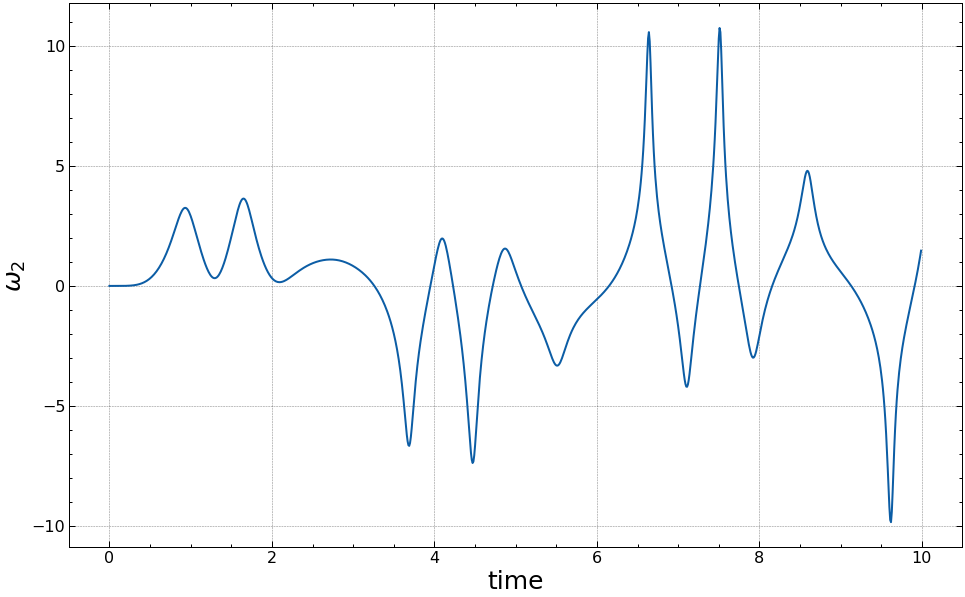

In [7]:
plt.figure(figsize=(16, 10))
plt.plot(tt, WW2)
plt.xlabel("time", size = 25)
plt.ylabel(r"$\omega_2$", size = 25)
plt.show()

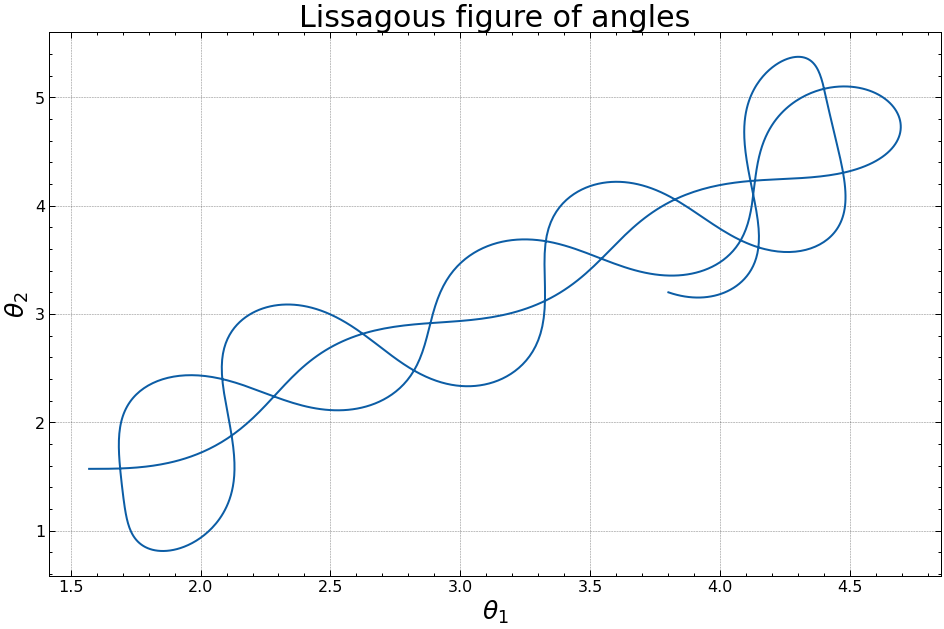

In [8]:
plt.figure(figsize=(16, 10))
plt.plot(THT1, THT2)
plt.title("Lissagous figure of angles", size = 30)
plt.xlabel(r"$\theta_1$", size = 25)
plt.ylabel(r"$\theta_2$", size = 25)
plt.show()

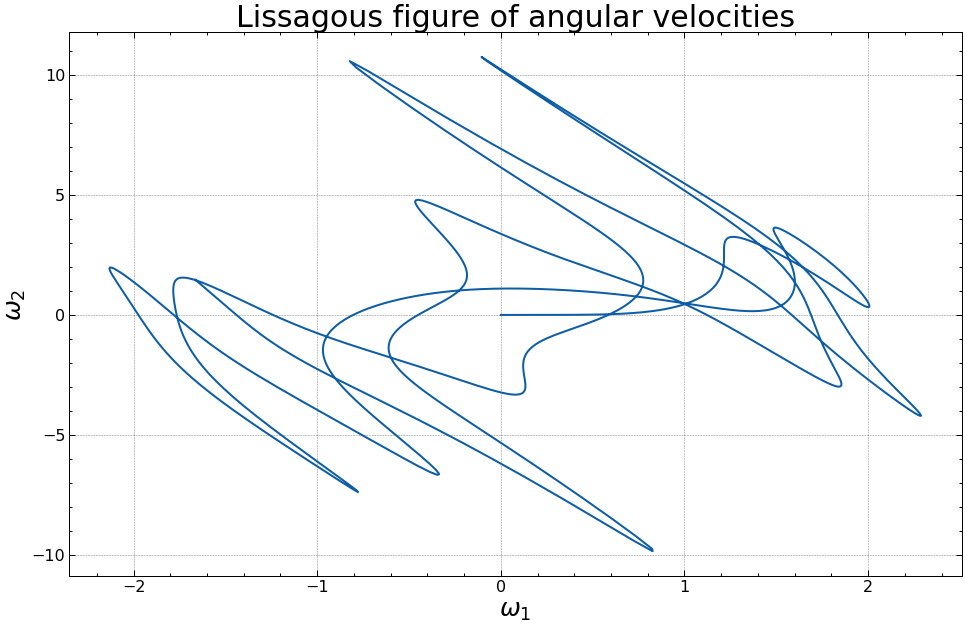

In [9]:
plt.figure(figsize=(16, 10))
plt.plot(WW1, WW2)
plt.title("Lissagous figure of angular velocities", size = 30)
plt.xlabel(r"$\omega_1$", size = 25)
plt.ylabel(r"$\omega_2$", size = 25)
plt.show()

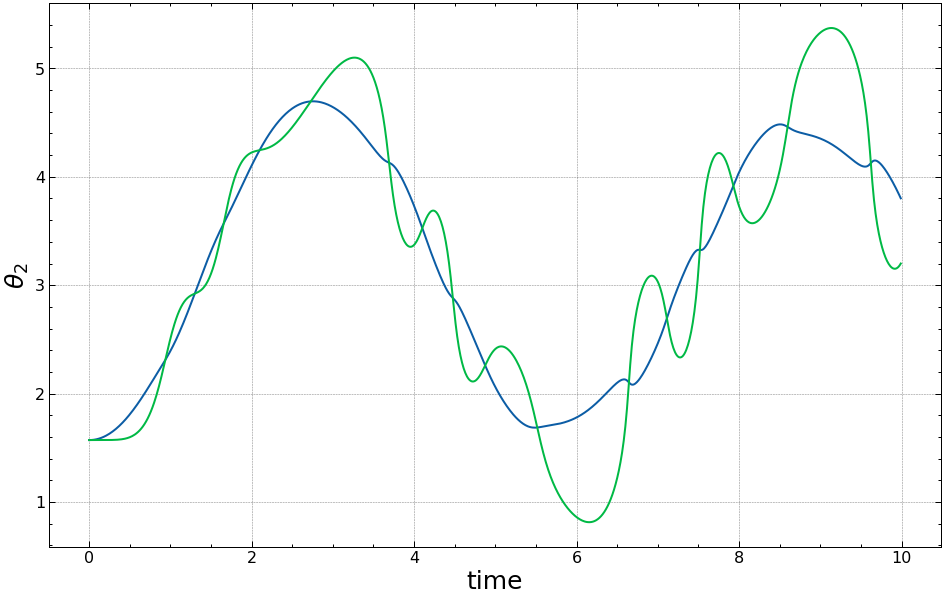

In [10]:
plt.figure(figsize=(16, 10))
plt.plot(tt, THT1)
plt.plot(tt, THT2)
plt.xlabel("time", size = 25)
plt.ylabel(r"$\theta_2$", size = 25)
plt.show()

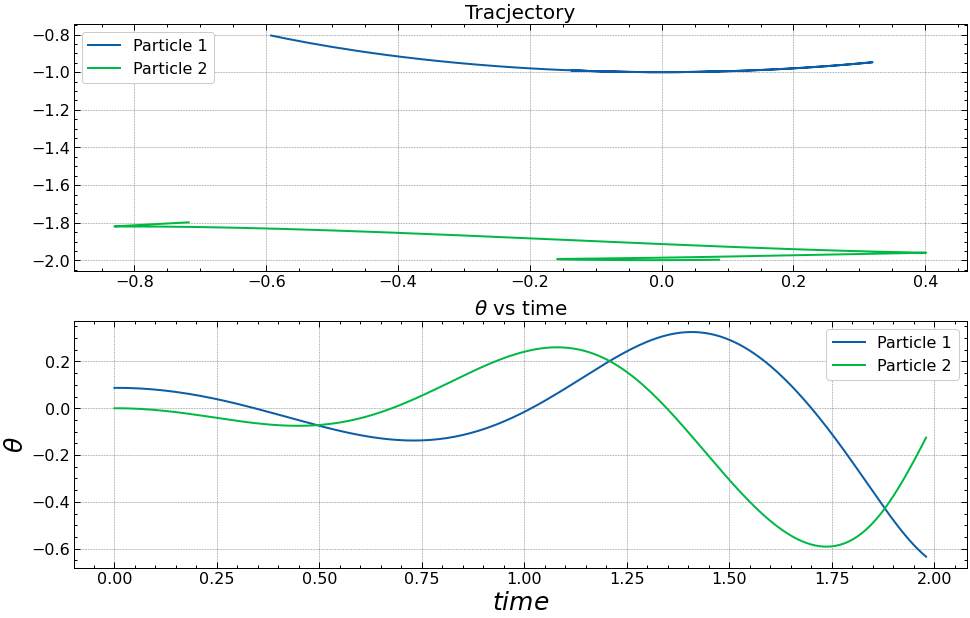

In [11]:
#Constants: 
m1 = 1; m2 = 1; l1 = 1; l2 = 1; g = 9.8

#Initial conditions
ti = 0; tht1 = np.pi/36; tht2 = 0; w1 = 0; w2 = 0; tf = 2; h = 0.01

#empty list
THT1 = []; THT2 = []; tt = []; W1 = []; W2 = []; x1 = []; y1 = [];x2 = []; y2 =[]

def Omega1(tht1, tht2, w1, w2):
    return (m2*g*l1*cos(tht1 - tht2)*sin(tht2) - m2*l1**2*cos(tht1 - tht2)*sin(tht1 - tht2)*w1**2 - m2*l1*l2*sin(tht1 - tht2)*w2**2 - g*(m1*l1 + m2*l2)*sin(tht1))/((m1 + m2)*l1**2 - m2*l1**2*(cos(tht1 - tht2))**2)
def Omega2(tht1, tht2, w1, w2):
    return ((m2**2/(m1+m2))*l2**2*cos(tht1 - tht2)*sin(tht1 - tht2)*w2**2 - (m2*l2*g*cos(tht1 - tht2)*sin(tht1)*(m1*l1 + m2*l2)/(l1*(m1+m2))) + m2*l1*l2*sin(tht1 - tht2)*w1**2 - m2*g*l2*sin(tht2))/(m2*l2**2 - m2**2*l2**2*(cos(tht1 - tht2)**2/(m1+m2)))

while (tf - ti) >= h:
    tt.append(ti)
    THT1.append(tht1)
    x1.append(l1*sin(tht1))
    y1.append(-l1*cos(tht1))
    THT2.append(tht2)
    x2.append(l1*sin(tht1) + l2*sin(tht2))
    y2.append(-(l1*cos(tht1) + l2*cos(tht2)))
    W1.append(w1)
    W2.append(w2)
    
    #Euler
    ti += h
    tht1 += h*w1
    tht2 += h*w2
    w1 += h*Omega1(tht1, tht2, w1, w2)
    w2 += h*Omega2(tht1, tht2, w1, w2)
    
#Plotting
plt.figure(figsize=(16, 10))
plt.subplot(211)
plt.title("Tracjectory", size = 20)
plt.plot(x1, y1, label = "Particle 1")
plt.plot(x2, y2, label = "Particle 2")
plt.legend()

plt.subplot(212)
plt.title(r"$\theta$ vs time", size = 20)
plt.plot(tt, THT1, label = "Particle 1")
plt.plot(tt, THT2, label = "Particle 2")
plt.xlabel(r"$time$", size = 25)
plt.ylabel(r"$\theta$", size = 25)
plt.legend()


plt.show()

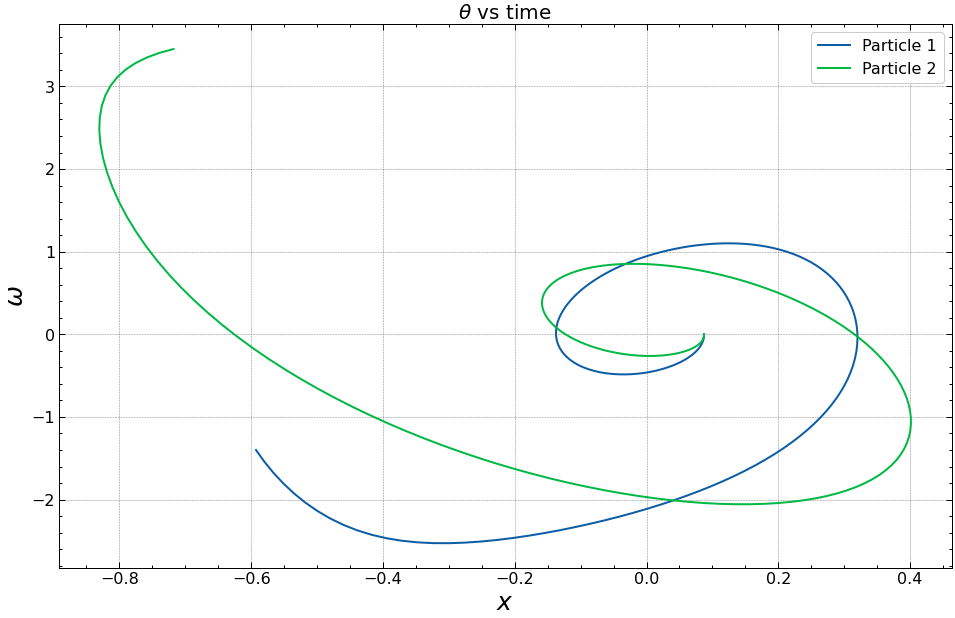

In [12]:
plt.figure(figsize=(16, 10))
plt.title(r"$\theta$ vs time", size = 20)
plt.plot(x1, W1, label = "Particle 1")
plt.plot(x2, W2, label = "Particle 2")
plt.xlabel(r"$x$", size = 25)
plt.ylabel(r"$\omega$", size = 25)
plt.legend()
plt.show()